In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
df=pd.read_excel(r"C:\Users\1\Downloads\central_bank_dataset.xlsx")

In [35]:
df.shape

(12162, 121)

In [36]:
pd.set_option('display.max_columns', 122)
pd.set_option('display.float_format', '{:.2f}'.format)



In [37]:
#Просмотр загруженного дата сета
df.head(3)

,Unnamed: 0,X,id_w,id_i,psu,gr_vozr,gr_educ,sett_typ,size,i_h4,i_h5,y5,y11,y12,y13,y14,y16,y6_1,y6_2,y6_3,y8,y9,m2_1,t14,y17,k1,k42a,k66a,k84,m7_1,m14,m15,k85,m19,k86_1,m20,k87,k88,k91,k92,p1_1a,p1_9,p12_8,p9_7,pp10_1,pp10_2,pp10_3,p10_91,p10_92,p10_93,p10_13,t1,t3,t4,t18,t19,t21,t23,t5,t27,t32,t6,t7,t8,t17,t11,t12,t13_1,t13_2,t13_3,t13_4,t13_5,t13_6,t13_7,t13_8,t13_9,i_x1,i_x3,i_x5,i_x6,k2code,k69_n_s_r,p10101y,p10101m,p10121,p10151,p10161,p10261,p10271,p10281,p1028a1,p95_11,p95_12,p95_13,p95_14,p95_15,p95_16,p95_17,p95_18,p95_19,p95110,p95111,p95_1s,p93_1y,p93_1m,c44_1,c44a_1,c44a_1_s_r,c44a_2,c44a_2_s_r,c44a_3,c44a_3_s_r,p96_1,p911_1,p911a1,p911a1_s_r,p911a2,p911a2_s_r,p911a3,p911a3_s_r,k68
0,0,1,2022,1000101,Ленинградская область,46-55 лет,Среднее специальное,Город,от 10 тыс.чел. до 100 тыс.чел.,ЖЕНСКИЙ,1968,"ТЕХНИКУМ, МЕДИЦИНСКОЕ, МУЗЫКАЛЬНОЕ, ХУДОЖЕСТВЕ...",Ухудшилось,Останется без изменения,НЕТ ОТВЕТА,ПЛОХОЕ,ПЛОХОЕ,ЭТО ТОЧНО ПРО МЕНЯ,СКОРЕЕ ЭТО НЕ ПРО МЕНЯ,"ПОЖАЛУЙ, ЭТО ПРО МЕНЯ",НЕ БОЛЕЕ МЕСЯЦА,Плохо,СОСТОЮ В ЗАРЕГИСТРИРОВАННОМ БРАКЕ,Да,Нет,Вы сейчас работаете,Нет,50000,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Никогда,ВОЗМОЖНОСТЬ РОСТА ЦЕН НА ТОВАРЫ И УСЛУГИ,Или Вы думаете в первую очередь о дополнительн...,"НА ПОКУПКУ ОДЕЖДЫ И ОБУВИ ДЕНЕГ ХВАТАЕТ, НО НЕ...",ПОТРАТИТЬ ДЕНЬГИ,ВЫСОКАЯ ИНФЛЯЦИЯ,Приблизительно пополам на счете в банке и в на...,"Росли быстрее, чем раньше",ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Нет,Нет,"Да, знаете",НЕТ СБЕРЕЖЕНИЙ,300,НАЛИЧНЫМИ НЕ РАСПЛАЧИВАЕТСЯ,Да,НЕ ДЕЛАЮ ЭТОГО,ТОЛЬКО БЕЗНАЛИЧНЫЕ (БАНК. КАРТОЙ),ТОЛЬКО БЕЗНАЛИЧНЫЕ (БАНК. КАРТОЙ),НИЧЕГО НЕ ИЗМЕНИЛОСЬ,УДОВЛЕТВОРИТЕЛЬНЫЕ ЗНАНИЯ И НАВЫКИ,ПРАВИЛЬНЫЙ ОТВЕТ (1 МИЛЛИОН 400 ТЫС. РУБЛЕЙ),"ЧЕМ ВЫШЕ ДОХОДНОСТЬ, ТЕМ ВЫШЕ РИСК",СТАВКА ЦЕНТРАЛЬНОГО БАНКА,Нет,Нет,НИ ПОД КАКИЕ ПРОЦЕНТЫ НЕ ПОЛОЖИТ,НЕТ ОТВЕТА,Нет,ПАНДЕМИЯ 2020-ГО ГОДА,"ЧИТАЮ ДОГОВОР, ЕСЛИ ЧТО-ТО НЕПОНЯТНО, ВЫЯСНЯЮ ...",ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,"Нет, письменный учет не ведется",ПОЛНОСТЬЮ СОГЛАСНЫ,ПОЛНОСТЬЮ СОГЛАСНЫ,СКОРЕЕ СОГЛАСНЫ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ПОЛНОСТЬЮ СОГЛАСНЫ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,СКОРЕЕ СОГЛАСНЫ,ПОЛНОСТЬЮ СОГЛАСНЫ,ПОЛНОСТЬЮ СОГЛАСНЫ,НЕТ,ХОРОШО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ",ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,"Рукодитель низшего звена (бригадир, супервайзер)",50060.00,2013,Июль,"Текущий счет, карточный счет, вклад до востреб...",Да,1,НЕТ ПРОЦЕНТНОЙ СТАВКИ,В рублях,ОТКАЗ ОТ ОТВЕТА,ОТКАЗ ОТ ОТВЕТА,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ТРАНСПОРТ, СВЯЗЬ"
1,1,2,2022,1000102,Ленинградская область,46-55 лет,Среднее общее и ниже,Город,от 10 тыс.чел. до 100 тыс.чел.,МУЖСКОЙ,1975,ТЕХНИЧЕСКОЕ УЧИЛИЩЕ,Ухудшилось,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ПЛОХОЕ,ПЛОХОЕ,ЭТО ТОЧНО ПРО МЕНЯ,ЭТО ТОЧНО ПРО МЕНЯ,ЭТО ТОЧНО ПРО МЕНЯ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Плохо,СОСТОЮ В ЗАРЕГИСТРИРОВАННОМ БРАКЕ,Да,Да,Вы сейчас работаете,Нет,50000,3,Никогда,ВОЗМОЖНОСТЬ СНИЖЕНИЯ УРОВНЯ ДОХОДОВ МОЕЙ СЕМЬИ,Или Вы думаете в первую очередь о дополнительн...,ДЕНЕГ ВПОЛНЕ ХВАТАЕТ НА ПОКУПКУ КРУПНОЙ БЫТОВО...,ОТКЛАДЫВАТЬ ДЕНЬГИ,НИЗКАЯ УВЕРЕННОСТЬ В БУДУЩЕМ,Приблизительно пополам на счете в банке и в на...,"Росли быстрее, чем раньше",Не изменятся,"ДОХОДЫ НЕ РОСЛИ, А ЦЕНЫ РОСЛИ",ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,Нет,"НЕ ЗНАЕТ, ЧТО ЭТО ТАКОЕ","Да, знаете",НЕТ СБЕРЕЖЕНИЙ,1000,НАЛИЧНЫМИ НЕ РАСПЛАЧИВАЕТСЯ,Да,НЕ ДЕЛАЮ ЭТОГО,ТОЛЬКО БЕЗНАЛИЧНЫЕ (БАНК. КАРТОЙ),ТОЛЬКО БЕЗНАЛИЧНЫЕ (БАНК. КАРТОЙ),НИЧЕГО НЕ ИЗМЕНИЛОСЬ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,НЕПРАВИЛЬНЫЙ ОТВЕТ,"ЧЕМ ВЫШЕ ДОХОДНОСТЬ, ТЕМ ВЫШЕ РИСК",СТАВКА ЦЕНТРАЛЬНОГО БАНКА,Нет,Нет,НИ ПОД КАКИЕ ПРОЦЕНТЫ НЕ ПОЛОЖИТ,Я НЕ ГОТОВ(А) ИДТИ НИ НА КАКИЕ ФИНАНСОВЫЕ РИСКИ,Нет,ПАНДЕМИЯ 2020-ГО ГОДА,"ЧИТАЮ ДОГОВОР, ЕСЛИ ЧТО-ТО НЕПОНЯТНО, ВЫЯСНЯЮ ...",ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,ЗАТРУДНЯЮСЬ ОТВЕТИТЬ,"Нет, письменный учет не ведется",СКОРЕЕ СОГЛАСНЫ,СКОРЕЕ СОГЛАСНЫ,СКОРЕЕ СОГЛАСНЫ,ПОЛНОСТЬЮ НЕ СОГЛАСНЫ,СКОРЕЕ НЕ СОГЛАСНЫ,СКОРЕЕ НЕ СОГЛАСНЫ,СКОРЕЕ

In [38]:
df.describe()

,Unnamed: 0,X,id_w,id_i,i_h5,k69_n_s_r,c44a_1_s_r,c44a_2_s_r,c44a_3_s_r,p911a1_s_r,p911a2_s_r,p911a3_s_r
count,12162.00,12162.00,12162.00,12162.00,12162.00,6680.00,827.00,110.00,26.00,695.00,93.00,23.00
mean,6080.50,6081.50,2022.00,92374722.17,1972.48,34048.52,359606.74,172459.09,118711.54,211082.52,114867.23,91100.00
std,3511.01,3511.01,0.00,77916122.08,17.35,26469.48,784161.17,225921.15,118028.49,619215.49,190486.54,131723.83
min,0.00,1.00,2022.00,1000101.00,1925.00,0.00,5000.00,6000.00,10000.00,375.00,900.00,1000.00
25%,3040.25,3041.25,2022.00,48902826.00,1959.00,20000.00,80000.00,50000.00,30000.00,30000.00,29000.00,20000.00
50%,6080.50,6081.50,2022.00,92002401.50,1973.00,28000.00,177000.00,100000.00,81000.00,90000.00,80000.00,50000.00
75%,9120.75,9121.75,2022.00,136900702.75,1987.00,40000.00,400000.00,215000.00,197500.00,210000.00,148000.00,94000.00
max,12161.00,12162.00,2022.00,1611051902.00,2004.00,600000.00,15000000.00,1700000.00,500000.00,14400000.00,1700000.00,600000.00


In [39]:
#Выбираем основным критерием для изучения оценку материального положения ячейка к85
df['k85'].value_counts()

k85
НА ПОКУПКУ ОДЕЖДЫ И ОБУВИ ДЕНЕГ ХВАТАЕТ, НО НЕ ХВАТАЕТ НА ПОКУПКУ КРУПНОЙ БЫТОВОЙ ТЕХНИКИ    5699
НА ПИТАНИЕ ДЕНЕГ ХВАТАЕТ, НО НЕ ХВАТАЕТ НА ПОКУПКУ ОДЕЖДЫ И ОБУВИ                            2408
ДЕНЕГ ВПОЛНЕ ХВАТАЕТ НА ПОКУПКУ КРУПНОЙ БЫТОВОЙ ТЕХНИКИ, НО МЫ НЕ МОЖЕМ КУПИТЬ АВТОМАШИНУ    2036
ДЕНЕГ ХВАТАЕТ НА ВСЁ, КРОМЕ ТАКИХ ПРИОБРЕТЕНИЙ КАК КВАРТИРА, ДОМ                              973
ДЕНЕГ НЕ ХВАТАЕТ ДАЖЕ НА ПИТАНИЕ                                                              523
ЗАТРУДНЯЮСЬ ОТВЕТИТЬ                                                                          333
МАТЕРИАЛЬНЫХ ЗАТРУДНЕНИЙ НЕ ИСПЫТЫВАЕМ, ПРИ НЕОБХОДИМОСТИ МОГЛИ БЫ КУПИТЬ КВАРТИРУ, ДОМ       107
ОТКАЗ ОТ ОТВЕТА                                                                                50
НЕТ ОТВЕТА                                                                                     33
Name: count, dtype: int64

In [40]:
#Оставим данные где есть ответ на вопрос об уровне дохода
df=df.drop(df[df['k85']=='ОТКАЗ ОТ ОТВЕТА'].index)
df=df.drop(df[df['k85']=='НЕТ ОТВЕТА'].index)
df=df.drop(df[df['k85']=='ЗАТРУДНЯЮСЬ ОТВЕТИТЬ'].index)
df['k85'].value_counts()

k85
НА ПОКУПКУ ОДЕЖДЫ И ОБУВИ ДЕНЕГ ХВАТАЕТ, НО НЕ ХВАТАЕТ НА ПОКУПКУ КРУПНОЙ БЫТОВОЙ ТЕХНИКИ    5699
НА ПИТАНИЕ ДЕНЕГ ХВАТАЕТ, НО НЕ ХВАТАЕТ НА ПОКУПКУ ОДЕЖДЫ И ОБУВИ                            2408
ДЕНЕГ ВПОЛНЕ ХВАТАЕТ НА ПОКУПКУ КРУПНОЙ БЫТОВОЙ ТЕХНИКИ, НО МЫ НЕ МОЖЕМ КУПИТЬ АВТОМАШИНУ    2036
ДЕНЕГ ХВАТАЕТ НА ВСЁ, КРОМЕ ТАКИХ ПРИОБРЕТЕНИЙ КАК КВАРТИРА, ДОМ                              973
ДЕНЕГ НЕ ХВАТАЕТ ДАЖЕ НА ПИТАНИЕ                                                              523
МАТЕРИАЛЬНЫХ ЗАТРУДНЕНИЙ НЕ ИСПЫТЫВАЕМ, ПРИ НЕОБХОДИМОСТИ МОГЛИ БЫ КУПИТЬ КВАРТИРУ, ДОМ       107
Name: count, dtype: int64

In [41]:
#Доработаем столбец с уровнем образования
df.gr_educ.replace('НЕТ ОТВЕТА','Среднее общее и ниже', inplace=True)
df.gr_educ.replace('ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','Среднее общее и ниже', inplace=True)
df.gr_educ.replace('ОТКАЗ ОТ ОТВЕТА','Среднее общее и ниже', inplace=True)

df['gr_educ'].value_counts()

C:\Users\1\AppData\Local\Temp\ipykernel_44956\2799504037.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.gr_educ.replace('НЕТ ОТВЕТА','Среднее общее и ниже', inplace=True)
C:\Users\1\AppData\Local\Temp\ipykernel_44956\2799504037.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

gr_educ
Среднее общее и ниже        5375
Высшее и неполное высшее    3325
Среднее специальное         3046
Name: count, dtype: int64

In [42]:
#Выделим числовой столбец с уровнем дохода по возрастанию по показателям. Выделим три уровня - 0(низкий уровень), 1(средний уровень), 2(высокий уровень)
df['levels_income_1']=df['k85'].map({'ДЕНЕГ НЕ ХВАТАЕТ ДАЖЕ НА ПИТАНИЕ':0, 'НА ПИТАНИЕ ДЕНЕГ ХВАТАЕТ, НО НЕ ХВАТАЕТ НА ПОКУПКУ ОДЕЖДЫ И ОБУВИ':1,
                                      'НА ПОКУПКУ ОДЕЖДЫ И ОБУВИ ДЕНЕГ ХВАТАЕТ, НО НЕ ХВАТАЕТ НА ПОКУПКУ КРУПНОЙ БЫТОВОЙ ТЕХНИКИ':2,
                                      'ДЕНЕГ ВПОЛНЕ ХВАТАЕТ НА ПОКУПКУ КРУПНОЙ БЫТОВОЙ ТЕХНИКИ, НО МЫ НЕ МОЖЕМ КУПИТЬ АВТОМАШИНУ':3,
                                      'ДЕНЕГ ХВАТАЕТ НА ВСЁ, КРОМЕ ТАКИХ ПРИОБРЕТЕНИЙ КАК КВАРТИРА, ДОМ':4,
                                      'МАТЕРИАЛЬНЫХ ЗАТРУДНЕНИЙ НЕ ИСПЫТЫВАЕМ, ПРИ НЕОБХОДИМОСТИ МОГЛИ БЫ КУПИТЬ КВАРТИРУ, ДОМ':5})
df['levels_income_1'].value_counts()

levels_income_1
2    5699
1    2408
3    2036
4     973
0     523
5     107
Name: count, dtype: int64

In [43]:
#Выделим числовой столбец с уровнем дохода по возрастанию по группам. Выделим три уровня - 0(низкий уровень), 1(средний уровень), 2(высокий уровень)
df['levels_income_2']=df['k85'].map({'ДЕНЕГ НЕ ХВАТАЕТ ДАЖЕ НА ПИТАНИЕ':0, 'НА ПИТАНИЕ ДЕНЕГ ХВАТАЕТ, НО НЕ ХВАТАЕТ НА ПОКУПКУ ОДЕЖДЫ И ОБУВИ':0,
                                      'НА ПОКУПКУ ОДЕЖДЫ И ОБУВИ ДЕНЕГ ХВАТАЕТ, НО НЕ ХВАТАЕТ НА ПОКУПКУ КРУПНОЙ БЫТОВОЙ ТЕХНИКИ':1,
                                      'ДЕНЕГ ВПОЛНЕ ХВАТАЕТ НА ПОКУПКУ КРУПНОЙ БЫТОВОЙ ТЕХНИКИ, НО МЫ НЕ МОЖЕМ КУПИТЬ АВТОМАШИНУ':1,
                                      'ДЕНЕГ ХВАТАЕТ НА ВСЁ, КРОМЕ ТАКИХ ПРИОБРЕТЕНИЙ КАК КВАРТИРА, ДОМ':2,
                                      'МАТЕРИАЛЬНЫХ ЗАТРУДНЕНИЙ НЕ ИСПЫТЫВАЕМ, ПРИ НЕОБХОДИМОСТИ МОГЛИ БЫ КУПИТЬ КВАРТИРУ, ДОМ':2})
df['levels_income_2'].value_counts()

levels_income_2
1    7735
0    2931
2    1080
Name: count, dtype: int64

In [44]:
#Выделим из описания дата сета показатели предположительно наиболее влияющие на уровни дохода 
df_new=df[['levels_income_1', 'levels_income_2', 'gr_educ', 'i_h4','k1', 'm19', 'p9_7', 'p10281','k69_n_s_r','c44a_1_s_r', 'p911a1_s_r']]


In [45]:
df_new.head(2)

,levels_income_1,levels_income_2,gr_educ,i_h4,k1,m19,p9_7,p10281,k69_n_s_r,c44a_1_s_r,p911a1_s_r
0,2,1,Среднее специальное,ЖЕНСКИЙ,Вы сейчас работаете,ПОТРАТИТЬ ДЕНЬГИ,НЕТ СБЕРЕЖЕНИЙ,ОТКАЗ ОТ ОТВЕТА,50060.00,NaN,NaN
1,3,1,Среднее общее и ниже,МУЖСКОЙ,Вы сейчас работаете,ОТКЛАДЫВАТЬ ДЕНЬГИ,НЕТ СБЕРЕЖЕНИЙ,ОТКАЗ ОТ ОТВЕТА,50000.00,NaN,NaN


In [46]:
#Отцифруем пол респондентов. Согласно выборки женщин опрашивали больше мужчин
df_new['sex']=1
df_new.loc[df['i_h4']=='ЖЕНСКИЙ', 'sex']=0
df_new['sex'].value_counts()

C:\Users\1\AppData\Local\Temp\ipykernel_44956\3320488886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['sex']=1


sex
0    6844
1    4902
Name: count, dtype: int64

In [47]:
df_new['gr_educ'].value_counts()

gr_educ
Среднее общее и ниже        5375
Высшее и неполное высшее    3325
Среднее специальное         3046
Name: count, dtype: int64

In [48]:
df_new['k1'].value_counts()

k1
Вы сейчас работаете                                                                    6528
У Вас сейчас нет работы                                                                5041
Вы находитесь в официальном отпуске - декретном или по уходу за ребёнком до 3-х лет     152
Вы находитесь в любом другом оплачиваемом отпуске                                        13
Вы находитесь в неоплачиваемом отпуске                                                    5
ОТКАЗ ОТ ОТВЕТА                                                                           4
ЗАТРУДНЯЮСЬ ОТВЕТИТЬ                                                                      3
Name: count, dtype: int64

In [49]:
#Отцифруем наличие работы на момент опроса.
df_new['jobs']=1
df_new.loc[df_new['k1']!='Вы сейчас работаете', 'jobs']=0
df_new['jobs'].value_counts()

C:\Users\1\AppData\Local\Temp\ipykernel_44956\3815910848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['jobs']=1


jobs
1    6528
0    5218
Name: count, dtype: int64

In [50]:
df_new['m19'].value_counts()


m19
ОТКЛАДЫВАТЬ ДЕНЬГИ      6055
ПОТРАТИТЬ ДЕНЬГИ        4168
ЗАТРУДНЯЮСЬ ОТВЕТИТЬ    1494
ОТКАЗ ОТ ОТВЕТА           19
НЕТ ОТВЕТА                10
Name: count, dtype: int64

In [51]:
#Разделим группу на тех кто хочет сберегать (1) и тех кто сберегать не хочет(0)
df_new['saving_choice']=0
df_new.loc[df['m19']=='ОТКЛАДЫВАТЬ ДЕНЬГИ','saving_choice']=1
df_new['saving_choice'].value_counts()

C:\Users\1\AppData\Local\Temp\ipykernel_44956\3455286838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['saving_choice']=0


saving_choice
1    6055
0    5691
Name: count, dtype: int64

In [52]:
df_new['p9_7'].value_counts()

p9_7
НЕТ СБЕРЕЖЕНИЙ          7143
НА ДОЛГОСРОЧНЫЕ ЦЕЛИ    2160
НА БЛИЖАЙШИЕ МЕСЯЦЫ     2053
ОТКАЗ ОТ ОТВЕТА          179
ЗАТРУДНЯЮСЬ ОТВЕТИТЬ     137
НЕТ ОТВЕТА                74
Name: count, dtype: int64

In [53]:
#Разделим группу на тех у кого есть сбережения (1) и тех у кого их нет(0)
df_new['have_savings']=0
df_new.loc[(df_new['p9_7'] == 'НА ДОЛГОСРОЧНЫЕ ЦЕЛИ')|(df_new['p9_7'] == 'НА БЛИЖАЙШИЕ МЕСЯЦЫ'),'have_savings']=1
df_new['have_savings'].value_counts()

C:\Users\1\AppData\Local\Temp\ipykernel_44956\2598350007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['have_savings']=0


have_savings
0    7533
1    4213
Name: count, dtype: int64

In [54]:
df_new['p10281'].value_counts()

p10281
ЗАТРУДНЯЮСЬ ОТВЕТИТЬ    1088
ОТКАЗ ОТ ОТВЕТА          982
0                        508
10000                    463
5000                     461
                        ... 
6400                       1
840                        1
106000                     1
34800                      1
1100000                    1
Name: count, Length: 552, dtype: int64

In [55]:
#Выделим сумму сбережений у тех, кто готов поделиться этой информацией
df_new.loc[(df['p10281']=='ЗАТРУДНЯЮСЬ ОТВЕТИТЬ')|(df['p10281']=='ОТКАЗ ОТ ОТВЕТА')|(df['p10281']=='НЕТ ОТВЕТА'), 'p10281']=0
df_new['p10281'].fillna(0, inplace=True)
df_new['p10281']=df_new['p10281'].astype(float)
df_new.rename(columns={'p10281':'sum_saving'}, inplace=True)



C:\Users\1\AppData\Local\Temp\ipykernel_44956\3699296722.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['p10281'].fillna(0, inplace=True)
C:\Users\1\AppData\Local\Temp\ipykernel_44956\3699296722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['p10281'].fillna(0, inplace=True)
C:\Users\1\AppData\Local\Temp\ipykernel_44956

In [56]:
#Проверим оставщиеся пропущенные значения
df_new.isna().sum()

levels_income_1        0
levels_income_2        0
gr_educ                0
i_h4                   0
k1                     0
m19                    0
p9_7                   0
sum_saving             0
k69_n_s_r           5242
c44a_1_s_r         10939
p911a1_s_r         11070
sex                    0
jobs                   0
saving_choice          0
have_savings           0
dtype: int64

In [57]:
#Заполним пустые значения и переименуем столбцы
df_new['k69_n_s_r'].fillna(df_new['k69_n_s_r'].median(), inplace=True)
df_new['c44a_1_s_r'].fillna(0, inplace=True)
df_new['p911a1_s_r'].fillna(0, inplace=True)
df_new.rename(columns={'k69_n_s_r':'salary', 'c44a_1_s_r':'credit'}, inplace=True)


C:\Users\1\AppData\Local\Temp\ipykernel_44956\3983672617.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['k69_n_s_r'].fillna(df_new['k69_n_s_r'].median(), inplace=True)
C:\Users\1\AppData\Local\Temp\ipykernel_44956\3983672617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['k69_n_s_r'].fillna(df_new['k69_n_s_r'].median(),

In [58]:
#Выделим отдельно столбец с делением на тех у кого есть крелиты (1) и у кого их нет (0)
df_new['have_credit']=0
df_new.loc[df_new['credit']!=0, 'have_credit']=1
df_new.columns

C:\Users\1\AppData\Local\Temp\ipykernel_44956\3161268468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['have_credit']=0


Index(['levels_income_1', 'levels_income_2', 'gr_educ', 'i_h4', 'k1', 'm19',
       'p9_7', 'sum_saving', 'salary', 'credit', 'p911a1_s_r', 'sex', 'jobs',
       'saving_choice', 'have_savings', 'have_credit'],
      dtype='object')

<Axes: >

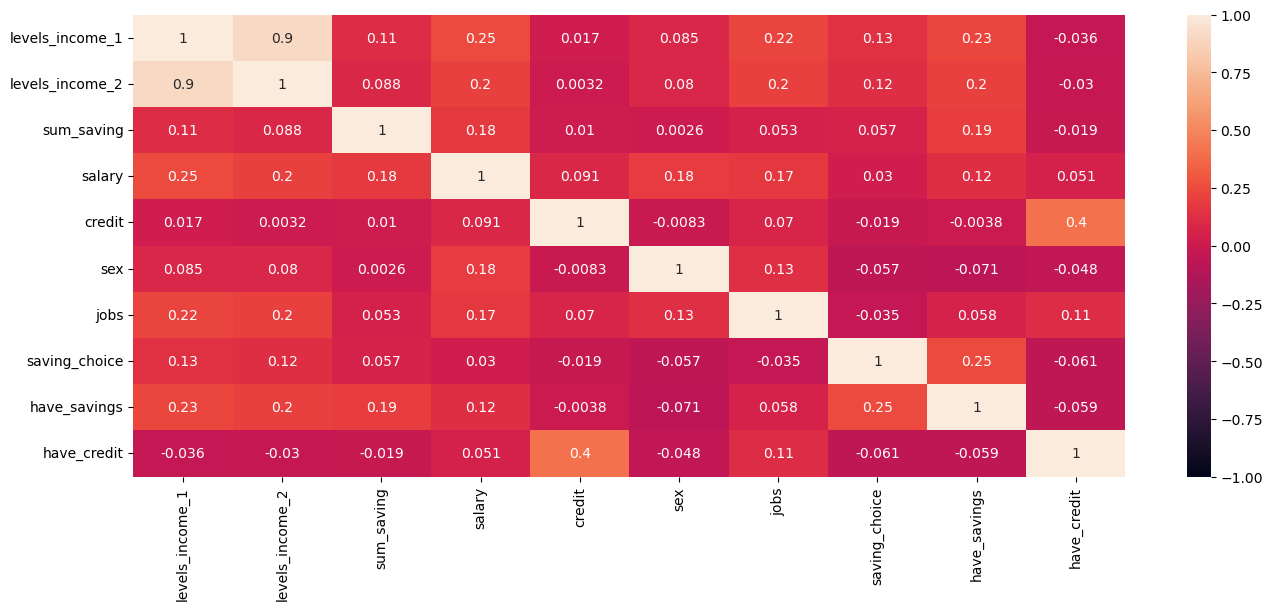

In [59]:
#Посмотрим корреляцию цифровых значений
df_corr=df_new[['levels_income_1', 'levels_income_2', 'sum_saving', 'salary', 'credit', 'sex', 'jobs',
       'saving_choice', 'have_savings', 'have_credit']]
plt.figure(figsize=(16,6))
sns.heatmap(df_corr.corr(), vmax=1, vmin=-1, annot=True)

<Axes: xlabel='count', ylabel='levels_income_1'>

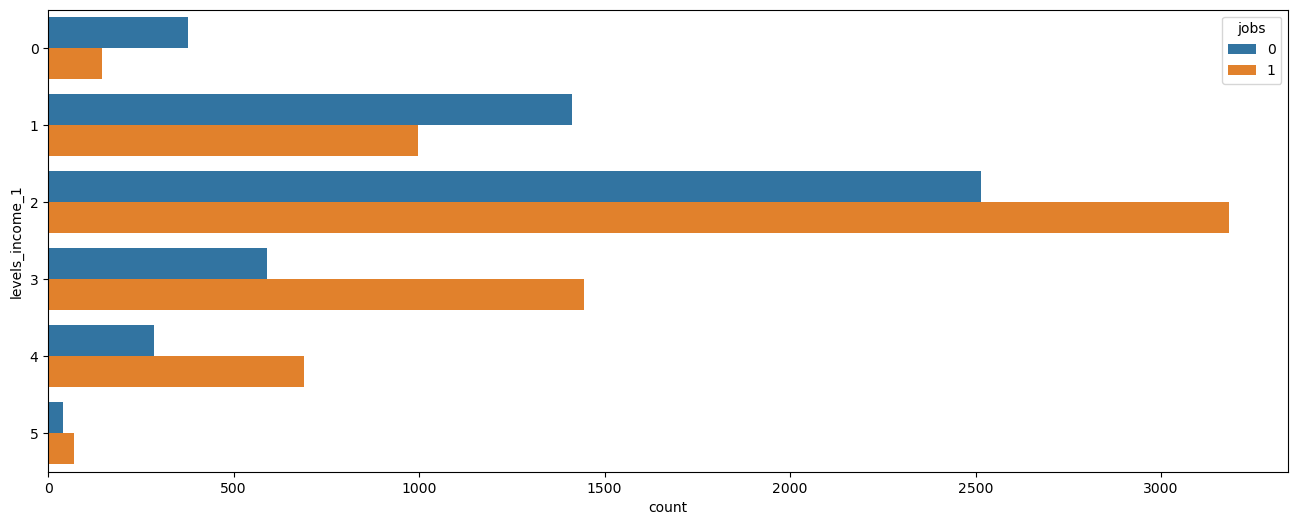

In [ ]:
#Посмотрим самые коррелирующие показатели с уровнем дохода на графике.Наличие работы
plt.figure(figsize=(16,6))
sns.countplot(y='levels_income_1', hue='jobs', data=df_new)

<Axes: xlabel='count', ylabel='levels_income_1'>

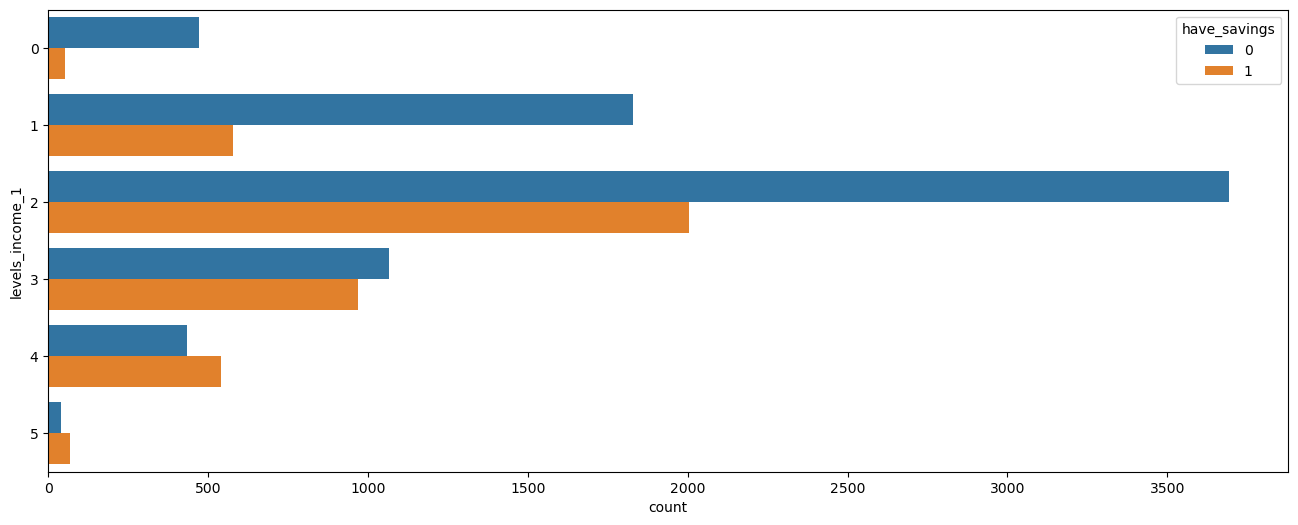

In [ ]:
#Посмотрим самые коррелирующие показатели с уровнем дохода на графике.Наличие сберрежений
plt.figure(figsize=(16,6))
sns.countplot(y='levels_income_1', hue='have_savings', data=df_new)

<Axes: xlabel='count', ylabel='levels_income_1'>

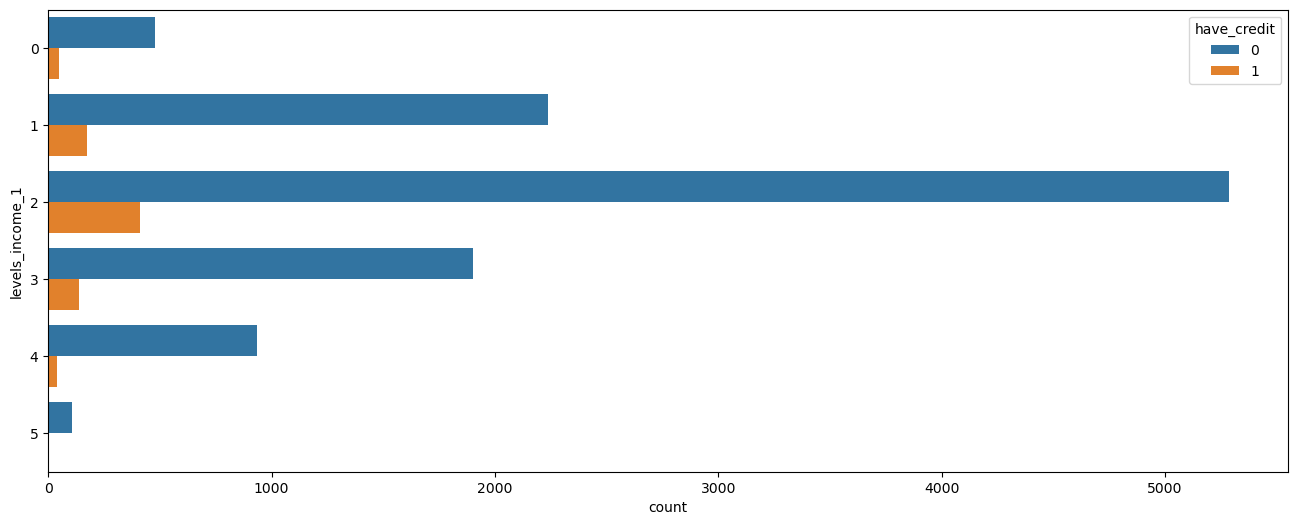

In [66]:
#Посмотрим самые коррелирующие показатели с уровнем дохода на графике.Наличие сберрежений
plt.figure(figsize=(16,6))
sns.countplot(y='levels_income_1', hue='have_credit', data=df_new)

In [62]:
df_new.columns

Index(['levels_income_1', 'levels_income_2', 'gr_educ', 'i_h4', 'k1', 'm19',
       'p9_7', 'sum_saving', 'salary', 'credit', 'p911a1_s_r', 'sex', 'jobs',
       'saving_choice', 'have_savings', 'have_credit'],
      dtype='object')

In [63]:
# Выберем нужные столбцы. На всякий случай сохраним в другом дата фрейме df_new_2
df_new_2=df_new[['levels_income_1', 'gr_educ', 'sum_saving', 'salary', 'credit', 'sex', 'jobs',
       'saving_choice', 'have_savings', 'have_credit']]


In [64]:
# Создадим модель регрессии где проанализируем зависимость уровня дохода от данных опроса и силу влияния факторов.
import statsmodels.formula.api as smf
model = smf.ols(formula='levels_income_1 ~ C(gr_educ) +sum_saving + salary +  sex + jobs + saving_choice + have_savings + have_credit', data=df_new_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        levels_income_1   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     233.1
Date:                Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                        12:30:46   Log-Likelihood:                -15489.
No. Observations:               11746   AIC:                         3.100e+04
Df Residuals:                   11736   BIC:                         3.107e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              1.5213      0.027     56.586      0.000       1.469       1.574
C(gr_educ)[T.Среднее общее и ниже]    -0.2169      0.021    -10.222      0.000      -0.258      -0.175
C(gr_educ)[T.Среднее специальное]     -0.1324      0.023     -5.718      0.000      -0.178      -0.087
sum_saving                          4.173e-07   1.35e-07      3.100      0.002    1.53e-07    6.81e-07
salary                              8.022e-06   4.47e-07     17.953      0.000    7.15e-06     8.9e-06
sex                                    0.1156      0.018      6.511      0.000       0.081       0.150
jobs                                   0.3279      0.018     18.608      0.000       0.293       0.362
saving_choice                          0.1803      0.017     10.422      0.000       0.146       0.214
have_savings                           0.3212      0.019     17.270      0.000       0.285       0.358
have_credit                           -0.1853      0.033     -5.537      0.000      -0.251      -0.120
==============================================================================
Omnibus:                      363.296   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.773
Skew:                           0.396   Prob(JB):                     9.52e-93
Kurtosis:                       3.488   Cond. No.                     2.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
#Что мы видим по итогу модели. Значения выбраны верно и все статистически значимо влияют на уровень жизни респондентов. (P>|t|)
#При этом коэффициент  R-squared=0.151, больше 0, что говорит нам - зависимость от выбранных факторов есть, но около 85% влияния на исследуемые показатели приходится на другие факторы.
#Тем не менее если рассматривать что же все-таки влияет на уровень дохода опрошенных можно сделать следующие выводы
#1. Уровень образования, чемы ниже уровень - тем ниже доход. (C(gr_educ)[T.Среднее общее и ниже]	-0.2169, C(gr_educ)[T.Среднее специальное]	-0.1324)
#2. Наличие работы положительно сказывается на показателе. (jobs	0.3279)
#3. Наличие сбережений положительно сказывается на показателе. (have_savings	0.3212)
#4. Выбор между тратами и накоплениями в пользу накоплений положительно сказывается на показателе. (saving_choice	0.1803)
#5. Доля мужчин растет с уровнем дохода, фактор пола значим, мучжины зарабатывают больше женщин. (sex	0.1156)
#6. Наличие кредита негативно влияет на уровень дохода. (have_credit	-0.1853)
#Если оценивать поведенческие стратегии по отношению к деньгам видно, что определяющим фактором изменения уровня дохода является выбор людей либо сберегать и копить (+), либо тратить и кредитоваться (-)
